# Advanced Calculus with SageMath - Chapter 8

## Real-World Applications and Modeling

This notebook contains Chapter 8 from the main Advanced Calculus with SageMath notebook.

For the complete course, please refer to the main notebook: `Advanced Calculus with SageMath.ipynb`


In [3]:
# Comprehensive imports for advanced calculus
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.optimize as opt
import scipy.integrate as integrate
from scipy.integrate import solve_ivp, odeint
import sympy as sp
from sympy import *
from sage.all import *
import seaborn as sns

# Configure plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("Advanced Calculus Environment Initialized")
print("Tools: SageMath, NumPy, SciPy, SymPy, Matplotlib")
print("Ready for multivariable calculus, vector analysis, and PDEs!")

Advanced Calculus Environment Initialized
Tools: SageMath, NumPy, SciPy, SymPy, Matplotlib
Ready for multivariable calculus, vector analysis, and PDEs!


## Chapter 8: Real-World Applications and Modeling

### Applications in Physics and Engineering

Advanced calculus provides the mathematical foundation for:

1. **Electromagnetic Theory**: Maxwell's equations use vector calculus
2. **Fluid Dynamics**: Navier-Stokes equations describe fluid flow
3. **Heat Transfer**: Heat equation is a partial differential equation
4. **Quantum Mechanics**: Schrödinger equation involves complex multivariable functions
5. **General Relativity**: Einstein field equations use tensor calculus

### Case Study: Heat Diffusion

The heat equation in 2D is:
$$\frac{\partial u}{\partial t} = \alpha \nabla^2 u = \alpha \left(\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2}\right)$$

where u(x,y,t) is temperature and α is thermal diffusivity.

In [26]:
var('x y t alpha')
assume(alpha > 0); assume(t > 0)

# For LaTeX rendering
from IPython.display import Math, display

def L(s): display(Math(s))  # shortcut

# PDE and solution
u = exp(-(x^2 + y^2)/(4*alpha*t)) / (4*pi*alpha*t)

L(r"\textbf{HEAT DIFFUSION MODELING}")
L(r"\text{Heat equation: }\partial_t u = \alpha \nabla^2 u,\ \alpha>0")
L(r"u(x,y,t) = " + latex(u))

# Derivatives and Laplacian
du_dt = diff(u, t).simplify_full()
lap = (diff(u, x, 2) + diff(u, y, 2)).simplify_full()
res = (du_dt - alpha*lap).simplify_full()

L(r"\partial_t u = " + latex(du_dt))
L(r"\nabla^2 u = " + latex(lap))
L(r"\partial_t u - \alpha \nabla^2 u = " + latex(res))

# Total heat over R^2
mass = integrate(integrate(u, x, -oo, oo), y, -oo, oo).simplify_full()
L(r"\iint_{\mathbb{R}^2} u(x,y,t)\,dx\,dy = " + latex(mass))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

STABILITY: dt = 0.00100000000000000, dt_max = 0.166597


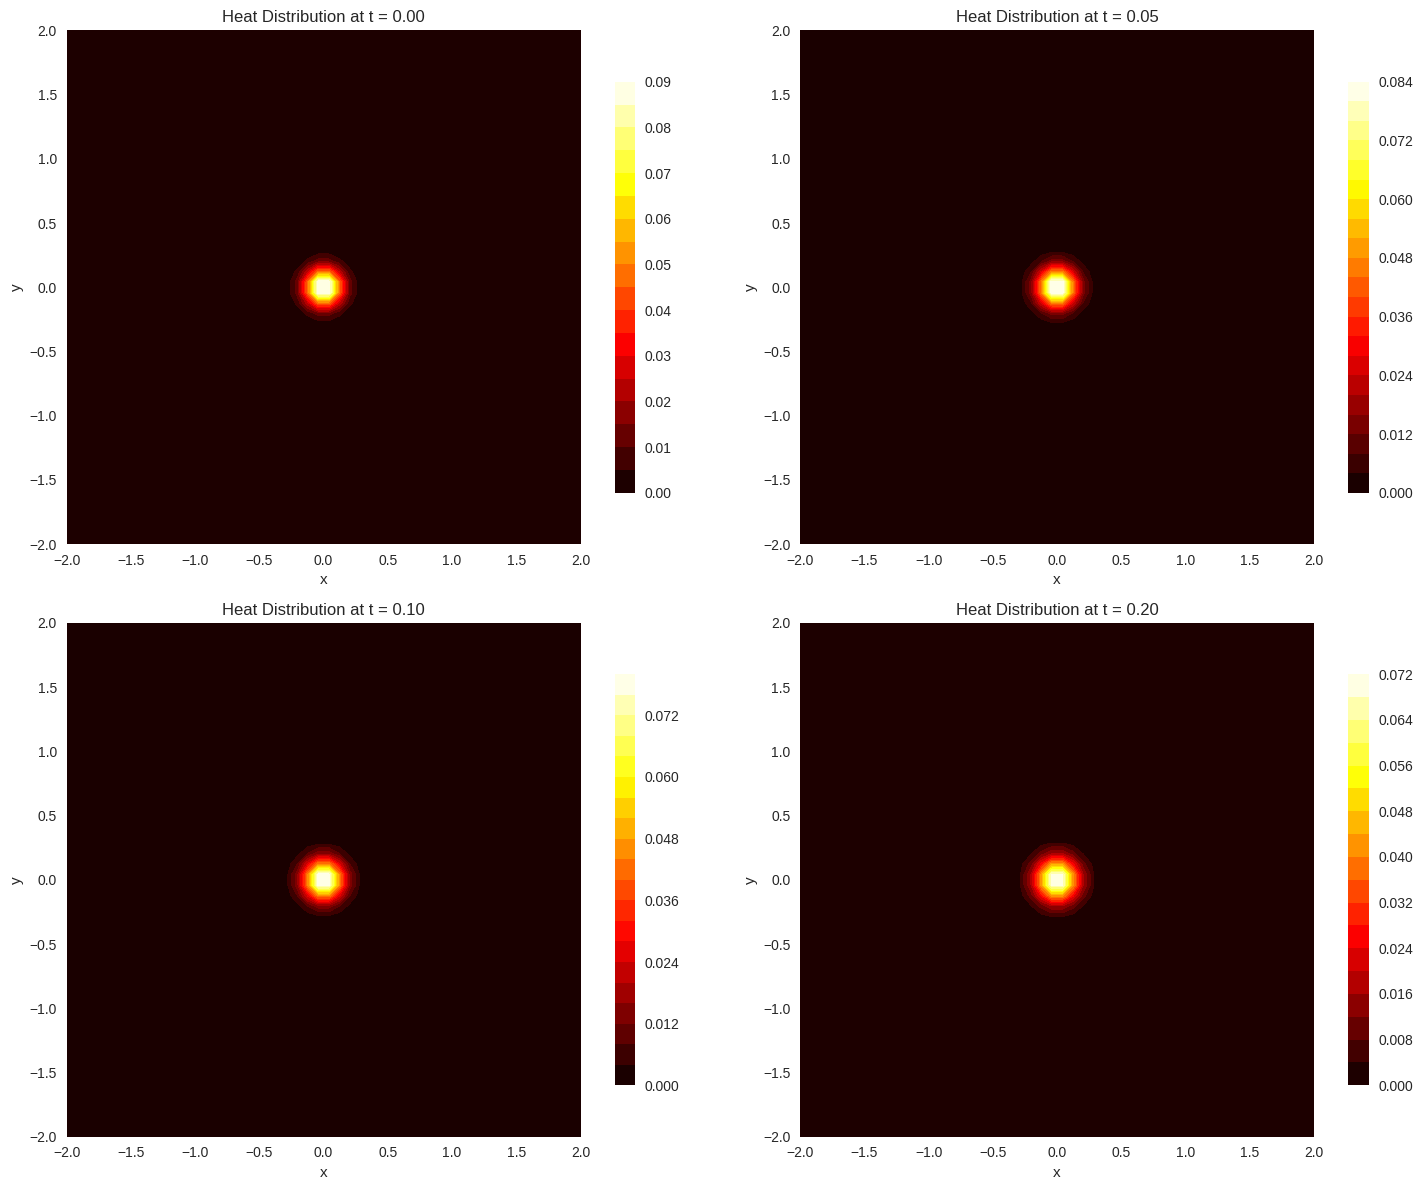

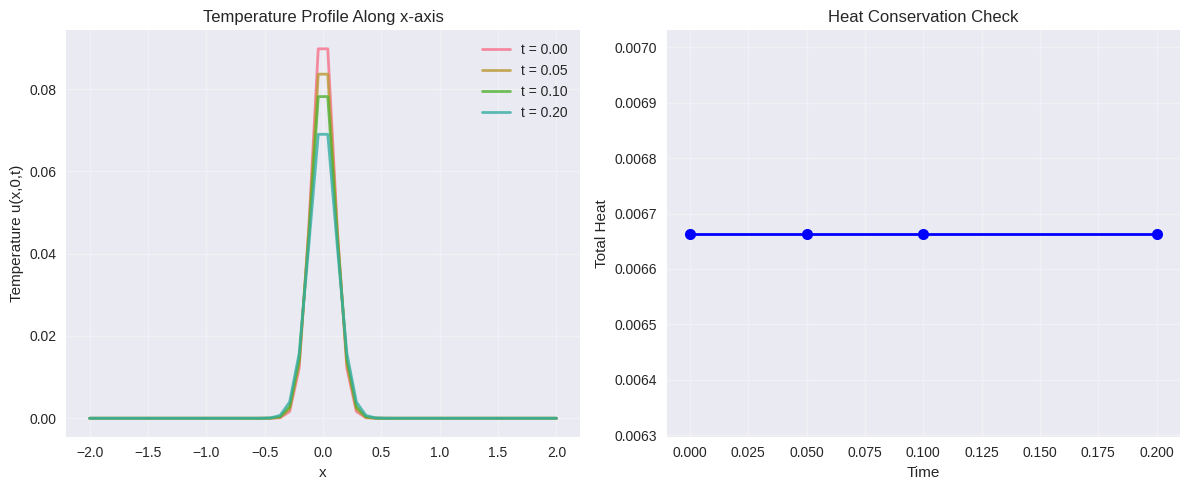

SIMULATION RESULTS
Initial total heat: 0.006664
Final total heat: 0.006664
Heat loss: 0.00%
(Small loss expected due to boundary conditions)


In [17]:
# Numerical simulation and visualization of heat diffusion
def simulate_heat_diffusion():
    """Simulate and visualize 2D heat diffusion"""
    
    # Parameters
    alpha_val = 0.01  # thermal diffusivity
    L = 2.0  # domain size
    nx, ny = 50, 50  # grid points
    dx = 2*L / (nx-1)
    dy = 2*L / (ny-1)
    dt = 0.001  # time step
    
    # Stability condition: dt ≤ dx²/(4α)
    dt_max = dx**2 / (4*alpha_val)
    print(f"STABILITY: dt = {dt}, dt_max = {dt_max:.6f}")
    if dt > dt_max:
        print("WARNING: Time step may be too large for stability")
    
    # Create grid
    x_grid = np.linspace(-L, L, nx)
    y_grid = np.linspace(-L, L, ny)
    X, Y = np.meshgrid(x_grid, y_grid)
    
    # Initial condition: Gaussian heat source at center
    sigma = 0.1
    u = np.exp(-(X**2 + Y**2)/(2*sigma**2))
    u = u / np.sum(u)  # Normalize total heat
    
    # Storage for animation frames
    times = [0, 0.05, 0.1, 0.2]
    frames = [u.copy()]
    
    # Time evolution using finite differences
    t_current = 0
    for target_time in times[1:]:
        while t_current < target_time:
            # Compute Laplacian using finite differences
            u_xx = (np.roll(u, 1, axis=1) - 2*u + np.roll(u, -1, axis=1)) / dx**2
            u_yy = (np.roll(u, 1, axis=0) - 2*u + np.roll(u, -1, axis=0)) / dy**2
            
            # Update temperature
            u = u + dt * alpha_val * (u_xx + u_yy)
            
            # Boundary conditions (fixed at zero)
            u[0, :] = u[-1, :] = u[:, 0] = u[:, -1] = 0
            
            t_current += dt
        
        frames.append(u.copy())
    
    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.flatten()
    
    for i, (ax, frame, time) in enumerate(zip(axes, frames, times)):
        im = ax.contourf(X, Y, frame, levels=20, cmap='hot')
        ax.set_title(f'Heat Distribution at t = {time:.2f}')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_aspect('equal')
        plt.colorbar(im, ax=ax, shrink=0.8)
    
    plt.tight_layout()
    plt.show()
    
    # Cross-section analysis
    plt.figure(figsize=(12, 5))
    
    # Temperature profiles along x-axis
    plt.subplot(121)
    center_y = ny // 2
    for i, (frame, time) in enumerate(zip(frames, times)):
        plt.plot(x_grid, frame[center_y, :], label=f't = {time:.2f}', 
                linewidth=2, alpha=0.8)
    plt.xlabel('x')
    plt.ylabel('Temperature u(x,0,t)')
    plt.title('Temperature Profile Along x-axis')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Total heat conservation check
    plt.subplot(122)
    total_heat = [np.sum(frame) * dx * dy for frame in frames]
    plt.plot(times, total_heat, 'bo-', linewidth=2, markersize=8)
    plt.xlabel('Time')
    plt.ylabel('Total Heat')
    plt.title('Heat Conservation Check')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"SIMULATION RESULTS")
    print(f"Initial total heat: {total_heat[0]:.6f}")
    print(f"Final total heat: {total_heat[-1]:.6f}")
    print(f"Heat loss: {(total_heat[0]-total_heat[-1])/total_heat[0]*100:.2f}%")
    print("(Small loss expected due to boundary conditions)")

simulate_heat_diffusion()

---

## **Continuing Your Learning Journey**

You've completed **Real-World Applications and Modeling**! The concepts you've mastered here form essential building blocks for what comes next.

**Ready for Advanced Computational Methods?**

In Chapter 9, we'll build upon these foundations to explore even more fascinating aspects of the subject. The knowledge you've gained here will directly apply to the advanced concepts ahead.

### **What's Next**

Chapter 9 will expand your understanding by introducing new techniques and applications that leverage everything you've learned so far.

**[Continue to Chapter 9: Advanced Computational Methods →](https://cocalc.com/share/public_paths/24cf5eb0f39fe22128deb26d3edeb31760eb0699)**

*or*

**[Return to Complete Course](https://cocalc.com/share/public_paths/ab3ad2f15d8989653377cbfdc238a82399b2633f)**